In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals
import neptune
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,GlobalAveragePooling2D, Concatenate, Reshape,GlobalMaxPooling2D, Activation, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import pandas
import os
import pathlib
import datetime
import math
import sys

# Config loading

train_path = "../../bachelor-data/data_resize/allTrain.csv"
validate_path ="../../bachelor-data/data_resize/allTest.csv"

image_dir = "../../bachelor-data/data_resize/"
checkpointpath = "../../bachelor-data/checkpoints/"
modelName = sys.argv[0]

learning_rate = 0.001

image_height = 224
image_width = 224
batch_size = 32
numEpochs = 75

conf= {
        "train_path": train_path,
        "validate_path": validate_path,
        "image_dir": image_dir,
        "modelName": modelName,
        "learning_rate": learning_rate,
        "image_height": image_height,
        "image_width": image_width,
        "batch_size": batch_size,
        "numEpochs": numEpochs
        }




# Data generators
train_df = pandas.read_csv(train_path)
validate_df = pandas.read_csv(validate_path)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        vertical_flip=True
        )

val_datagen = ImageDataGenerator(
        rescale=1./255,
        )


train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=image_dir,
        x_col="filename",
        y_col='label',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        shuffle=True,
        class_mode="raw",
        color_mode="rgb"
        )

val_generator = val_datagen.flow_from_dataframe(
        dataframe=validate_df,
        directory=image_dir,
        x_col="filename",
        y_col='label',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        shuffle=True,
        class_mode="raw",
        color_mode="rgb"
        )

# Model
RESNET = keras.applications.resnet.ResNet50(include_top=False, weights='imagenet', input_shape=(image_height,image_width,3), pooling="avg")
model = tf.keras.Sequential()


# Projection
model.add(Conv2D(3,(3,3),input_shape=(image_height,image_width,1),padding="same"))

# Resnet
model.add(RESNET)

model.add(Dense(512,Activation("relu")))
model.add(Dense(256,Activation("relu")))
model.add(Dense(128,Activation("relu")))
model.add(Dense(64,Activation("relu")))
model.add(Dense(1,Activation("relu")))


optimize = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimize,
              loss='MSE',
              metrics=['mse']
              )

model.summary()






Found 4367 validated image filenames.
Found 806 validated image filenames.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 3)       30        
_________________________________________________________________
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_____________________________________________

0.303


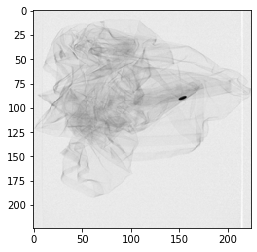

0.99


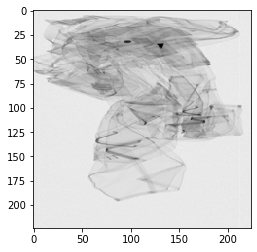

0.18


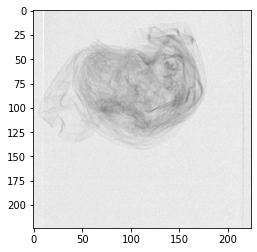

0.754


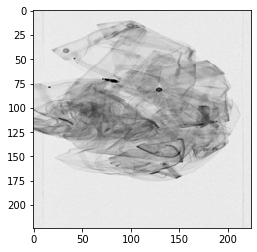

0.754


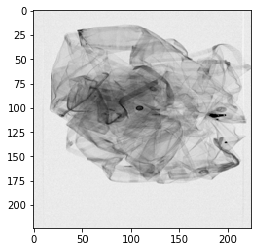

0.598


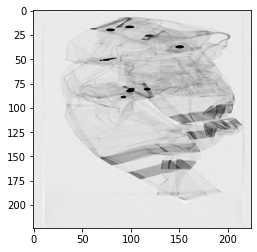

0.89


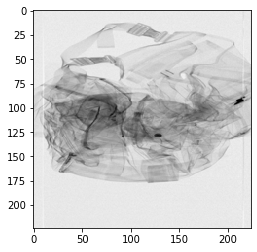

0.598


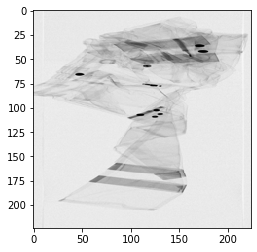

0.89


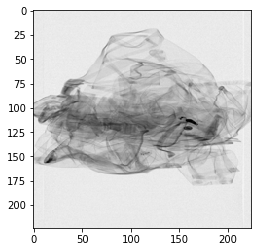

0.598


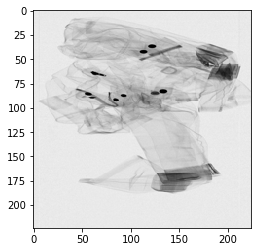

0.598


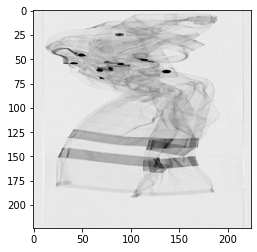

0.99


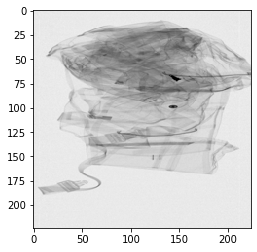

0.754


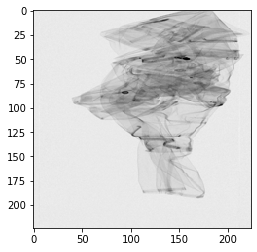

0.89


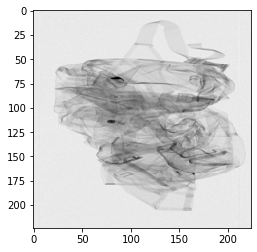

0.99


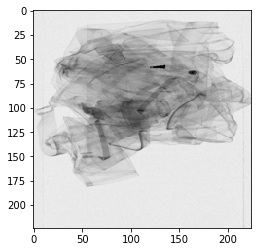

0.18


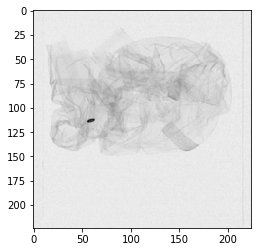

0.89


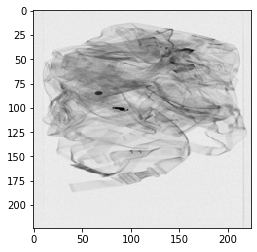

0.598


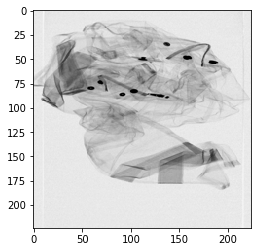

0.18


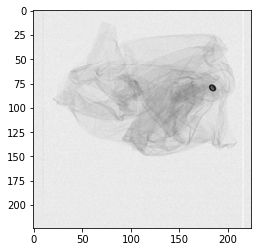

0.303


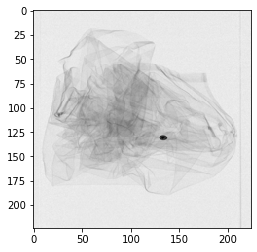

0.22699999999999998


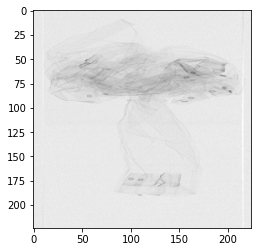

0.598


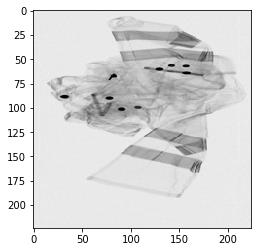

0.754


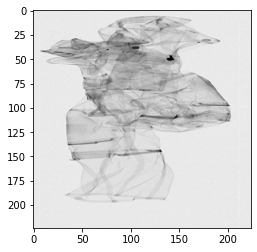

0.598


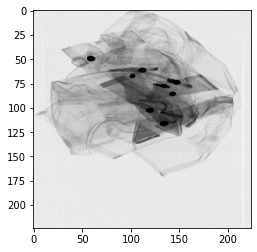

0.18


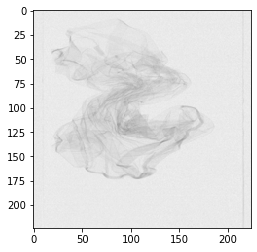

1.274


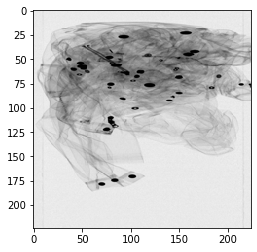

0.303


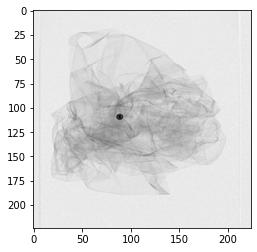

0.598


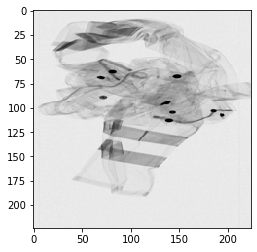

0.99


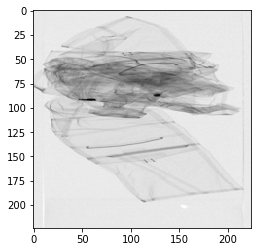

0.754


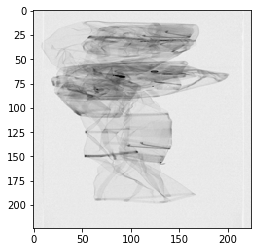

0.18


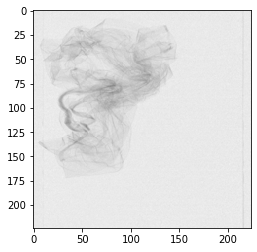

0.99


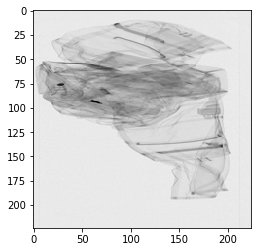

In [29]:
import matplotlib.pyplot as plt


x,y = val_generator.next()
for i in range(0,32):
    image = x[i]
    plt.imshow(image)
    print(y[i])
    plt.show()
